## Missing Values- Feature Engineering- Day 1

Lifecycle of a Data Science Projects
1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey
1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

# What are the different types of Missing Data?

# 1)Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.


In [53]:
import numpy as np
import pandas as pd

In [54]:
df=pd.read_csv('titanic.csv')

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
## Age is not at-all related to cabin

In [58]:
df['Embarked'].isnull().sum()

2

In [59]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# 2) Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [60]:
print("Number of null values in 'cabin' : ",df['Cabin'].isnull().sum())
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)    ## null --> 1 and not null --> 0

Number of null values in 'cabin' :  687


In [61]:
print(df['cabin_null'])

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int32


In [62]:
##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [63]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [64]:
df['Survived']  ## 1 -> alive and 0 -> dead

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [65]:
print("Dead  : ",len(df[df['Survived']==0]))
print("Alive : ",len(df[df['Survived']==1]))

Dead  :  549
Alive :  342


In [66]:
print("No person in Cabin : ",len(df[df['cabin_null']==1]))
print("Person in Cabin    : ",len(df[df['cabin_null']==0]))

No person in Cabin :  687
Person in Cabin    :  204


In [67]:
df.groupby(['Survived'])

In [68]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

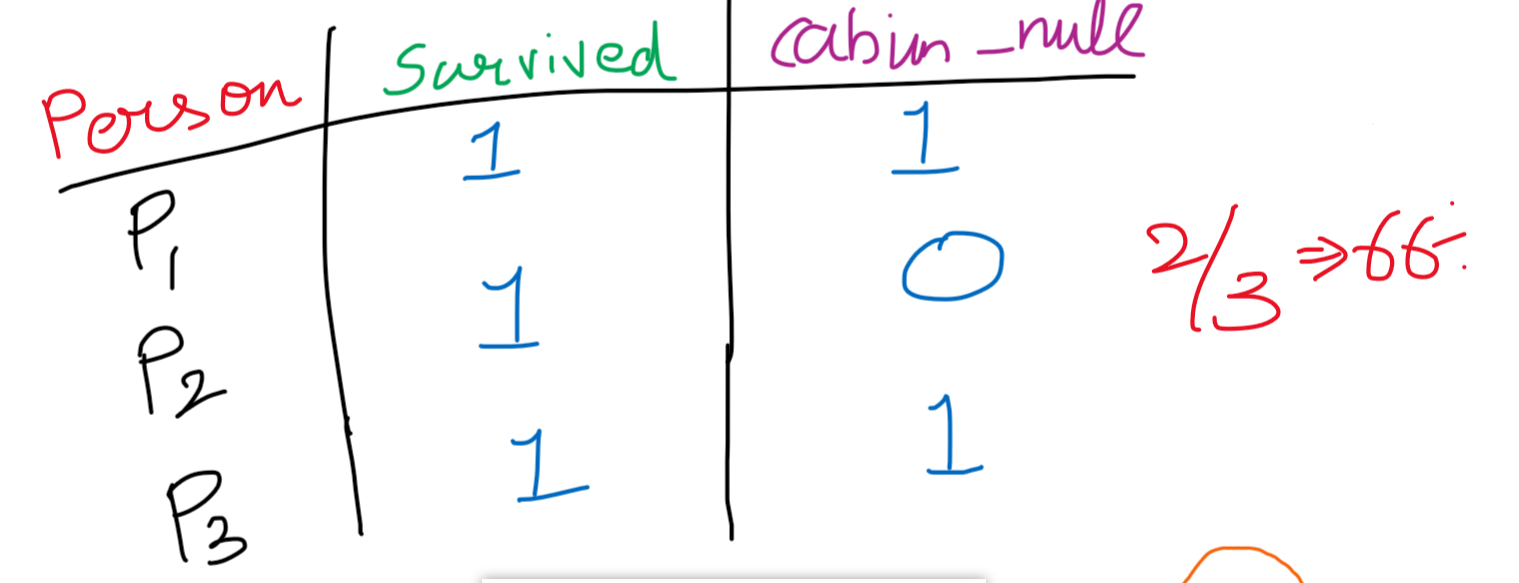

In [69]:
'''
87% percent of total dead persons cabin's data is missing 
60% percent of total survived persons cabin's data is missing
'''

'\n87% of cabin_null values have not survived (NULL values are more, since they are dead)\n60% of cabin_null values have survived \n'

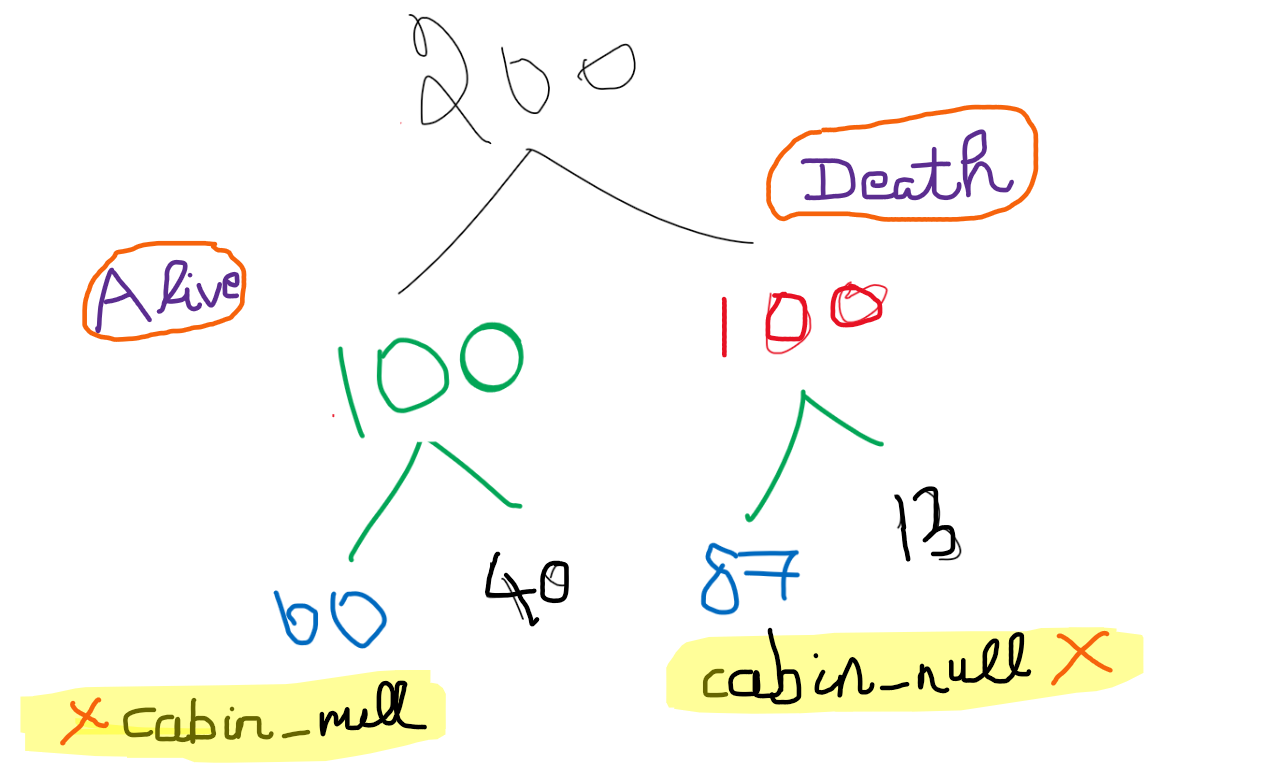

In [70]:
'''
0 --> not survived  (not getting dead people info and they are more)
1 --> survived (alive people are less)
There is no way to extract data from dead people, Most of data are missing for the dead people, 
'''

'\n0 --> not survived  (not getting dead people info and they are more)\n1 --> survived (alive people are less)\nThere is no way to extract data from dead people, Most of data are missing for the dead people, \n'

In [71]:
''' Here the data is not missed at random, The data is only missing when the perosn is dead'''

' Here the data is not missed at random, The data is only missing when the perosn is dead'

# 3)Missing At Random(MAR)

In [72]:
Men---hide their salary
Women---hide their age

SyntaxError: invalid syntax (<ipython-input-72-3c3dbb97fc2a>, line 1)

In [ ]:
### All the techniques of handling ,missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


# Mean/ MEdian /Mode imputation
When should we apply?
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [99]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [100]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [101]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [102]:
# 19% values are misssing

In [103]:
def impute_nan(df,variable,median):  ## going to replace missing values with median
    df[variable+"_median"] = df[variable].fillna(median)

In [104]:
df['Age'].mean()

29.69911764705882

In [105]:
median=df.Age.median()
median

28.0

In [106]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [107]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

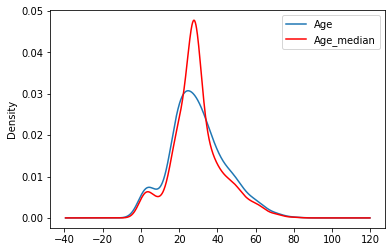

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [113]:
''' age and age_median variances are almost same. It is normally distributed. '''

' age and age_median variances are almost same. It is normally distributed. '

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation


In [112]:
df.corr()

,Survived,Age,Fare,Age_median
Survived,1.000000,-0.077221,0.257307,-0.064910
Age,-0.077221,1.000000,0.096067,1.000000
Fare,0.257307,0.096067,1.000000,0.096688
Age_median,-0.064910,1.000000,0.096688,1.000000


In [115]:
''' If variances are drastically changed then it will impacet on the correlation  '''

' If variances are drastically changed then it will impacet on the correlation  '

In [114]:
'''So we can fill age with median and can use for further processing '''

'So we can fill age with median and can use for further processing '